## Cancer Prediction

About Dataset
The provided dataset is a synthetically generated collection of information aimed at simulating a cancer prediction scenario for research purposes. It comprises 10,000 pseudo-patients, each characterized by five distinct parameters, namely: Gender, Age, Smoking, Fatigue, and Allergy, along with a binary indicator denoting the presence or absence of cancer. This synthetic dataset serves as a tool for researchers to explore and experiment with predictive models for cancer detection.<br>
<br>
The 'Gender' column is represented by binary values, where 0 corresponds to male and 1 corresponds to female. 'Age' spans a range from 18 to 100, reflecting the patient's age in years. 'Smoking' is a binary attribute, with 0 indicating non-smoker and 1 signifying a history of smoking. 'Fatigue' is similarly binary, with 0 denoting the absence of fatigue and 1 representing its presence. 'Allergy' is a binary variable indicating the presence or absence of allergies in the patient.<br>
<br>
The 'Cancer' column is the key target variable, where 0 signifies the absence of cancer and 1 indicates a simulated case of cancer. It is important to emphasize that this dataset is entirely synthetic and not derived from actual clinical records. Researchers are encouraged to use this dataset for exploratory purposes, model development, and algorithm testing. However, it should be noted that results obtained from this dataset should not be extrapolated to real-world medical scenarios without validation on authentic clinical data. The synthetic nature of this dataset allows for controlled experimentation and serves as a valuable resource for preliminary research in the field of cancer prediction. - Safiul

#### 1.Data Exploration

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv("cancer_prediction_dataset.csv")

In [136]:
display(df.head())

print("The dataset consist {} columns and {} samples".format(df.shape[1], df.shape[0]))

,Gender,Age,Smoking,Fatigue,Allergy,Cancer
0,1,85,1,0,1,0
1,1,93,0,0,0,0
2,1,72,0,1,0,0
3,0,58,0,0,1,0
4,1,95,1,0,1,1


The dataset consist 6 columns and 10000 samples


*Age feature range from 20-100, so we will categoricalize this feature.*

In [137]:
bin_age = [0,35,45,55,65,75,85,100]
category_age = ["20+", "35+", "45+", "55+", "65+", "75+", "85+"]
df["Age_category"] = pd.cut(df["Age"], bins=bin_age, labels=category_age)

df.drop(columns="Age", inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Gender        10000 non-null  int64   
 1   Smoking       10000 non-null  int64   
 2   Fatigue       10000 non-null  int64   
 3   Allergy       10000 non-null  int64   
 4   Cancer        10000 non-null  int64   
 5   Age_category  10000 non-null  category
dtypes: category(1), int64(5)
memory usage: 400.9 KB


In [139]:
target = "Cancer"
features = [i for i in df.columns if i not in target]

In [140]:
df.nunique()

Gender          2
Smoking         2
Fatigue         2
Allergy         2
Cancer          2
Age_category    7
dtype: int64

*All of the columns in dataset are categorical features*

#### 2. Explortory Data Analysis

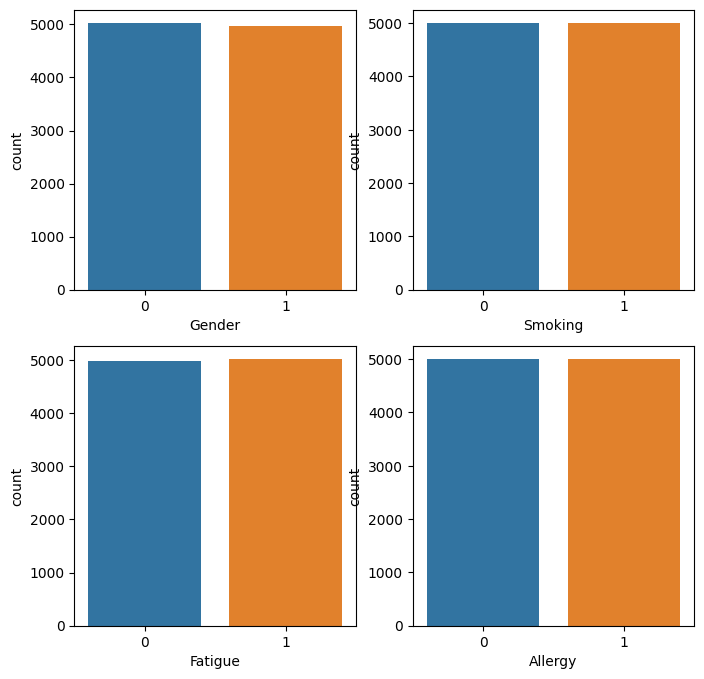

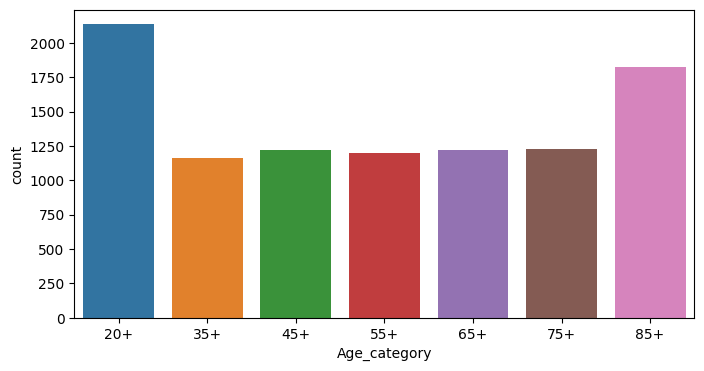

In [141]:
fig, ax = plt.subplots(2,2)
for i in range(len(features)):
    if i < 2:
        sns.countplot(df, x=features[i], hue=features[i], ax=ax[0,i], legend=False)
    elif i < 4:
        sns.countplot(df, x=features[i], hue=features[i], ax=ax[1,i-2], legend=False)
fig.set_size_inches(8,8)
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(df, x=features[4], hue=features[4], legend=False)
plt.show()

*Distribution in the categorical features are quite balanced*

#### 3.Data Preprocessing

In [142]:
print("The dataset contain only simple data, so it likely to see ass a duplicated data, so we will not remove duplicate in this dataset")
#print("Dataset before remove duplicate consists {} examples".format(df.shape[0]))
#df.drop_duplicates(inplace=True)
print("Dataset after remove duplicate consists {} examples".format(df.shape[0]))

The dataset contain only simple data, so it likely to see ass a duplicated data, so we will not remove duplicate in this dataset
Dataset after remove duplicate consists 10000 examples


In [143]:
null = df.isnull().sum()
percent = null / df.isnull().count()
pd.concat([null,percent], axis=1, keys=["Null", "Percent"])

,Null,Percent
Gender,0,0.0
Smoking,0,0.0
Fatigue,0,0.0
Allergy,0,0.0
Cancer,0,0.0
Age_category,0,0.0


*There is no missing value in this dataset*

In [144]:
X = df[features]
Y = df[target]

In [145]:
X = pd.get_dummies(X)

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### 4.Model Prediction

In [148]:
from sklearn import metrics

In [149]:
def evaluate(y_test, prediction):
    confusion_matrix = metrics.confusion_matrix(y_test,prediction) 
    cm_display = metrics.ConfusionMatrixDisplay( confusion_matrix=confusion_matrix, display_labels=[0, 1]) 
    cm_display.plot() 
    plt.show()
    score = metrics.accuracy_score(y_test, prediction)
    print("The accuracy score of this model is {:.2f}".format(score))
    return score

4.1 Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
LR_model = LogisticRegression()

LR_model.fit(x_train, y_train)

LR_prediction = LR_model.predict(x_test)

LR_score = metrics.accuracy_score(y_test, LR_prediction)

print("The accuracy score of Logistic Regresstion model is {:.2f}".format(LR_score))

The accuracy score of Logistic Regresstion model is 0.91


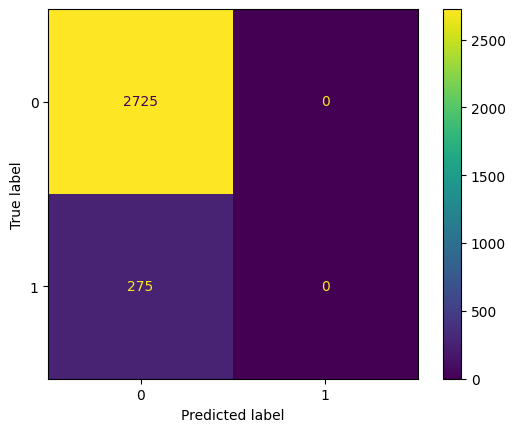

The accuracy score of this model is 0.91


In [152]:
LR_score =evaluate(y_test, LR_prediction)

4.2 KNN

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
n = 20
KNN_accuracy = []
for i in range(1,n):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(x_train, y_train)
    KNN_predict = KNN_model.predict(x_test)
    acc = metrics.accuracy_score(y_test, KNN_predict)
    KNN_accuracy.append(acc)
print("The maximum accruacy score of this model is {:.2f}".format(max(KNN_accuracy)))

The maximum accruacy score of this model is 0.91


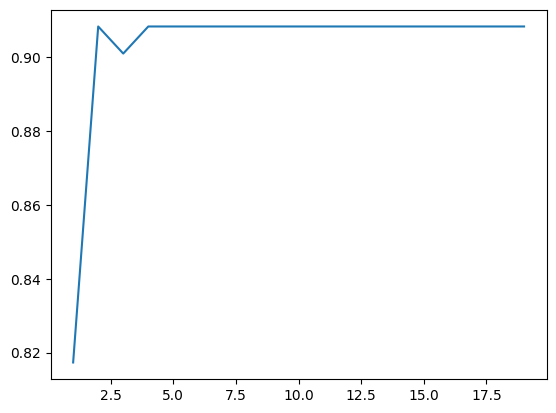

In [155]:
plt.plot(range(1,n), KNN_accuracy)

4.3 Naive Bayes

4.3.1 Categorical NB

In [156]:
from sklearn.naive_bayes import CategoricalNB

In [157]:
CNB_model = CategoricalNB()
CNB_model.fit(x_train, y_train)
CNB_acc = metrics.accuracy_score(CNB_model.predict(x_test), y_test)
print("The accuracy of the Categorical Naive Bayer is {:.2f}%".format(CNB_acc*100))

The accuracy of the Categorical Naive Bayer is 90.83%


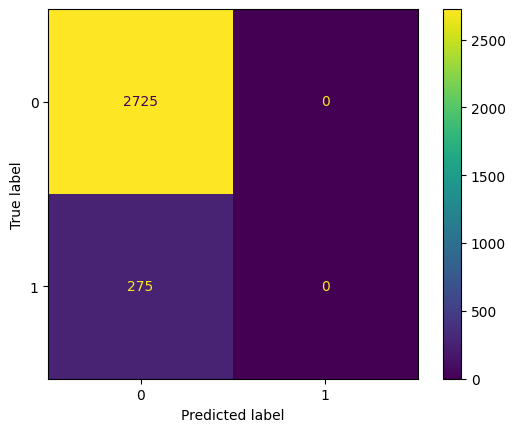

The accuracy score of this model is 0.91


0.9083333333333333

In [158]:
evaluate(y_test,CNB_model.predict(x_test) )

4.3.2 Gaussian Naive Bayes

In [159]:
from sklearn.naive_bayes import GaussianNB

In [160]:
GNB_model = GaussianNB()
GNB_model.fit(x_train, y_train)
GNB_acc = metrics.accuracy_score(GNB_model.predict(x_test), y_test)
print("The accuracy of the Gaussian Naive Bayer is {:.2f}%".format(GNB_acc*100))

The accuracy of the Gaussian Naive Bayer is 90.83%


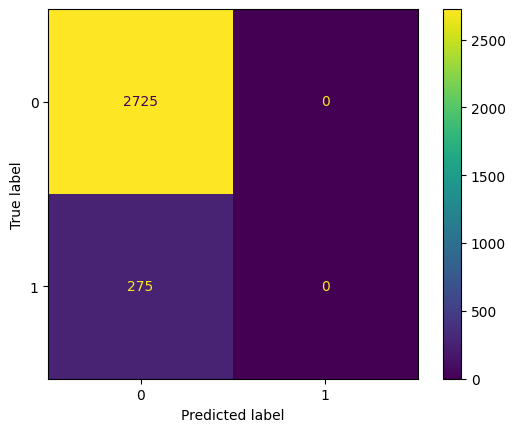

The accuracy score of this model is 0.91


0.9083333333333333

In [161]:
evaluate(y_test,GNB_model.predict(x_test) )

4.4 Decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
DT_acc = []
for i in range(2,20):
    DT_model = DecisionTreeClassifier(max_leaf_nodes=i)
    DT_model.fit(x_train, y_train)
    DTTacc = metrics.accuracy_score(DT_model.predict(x_test), y_test)
    DT_acc.append(DTTacc)
print("Accuracy of Decision Tree model is: {:.2f}%".format(max(DT_acc)*100))

Accuracy of Decision Tree model is: 90.83%


4.5 Random Forest

In [164]:
RF_acc = []
for i in range(2,20):
    RF_model = DecisionTreeClassifier(max_leaf_nodes=i)
    RF_model.fit(x_train, y_train)
    RFacc = metrics.accuracy_score(RF_model.predict(x_test), y_test)
    RF_acc.append(RFacc)
print("Accuracy of Decision Tree model is: {:.2f}%".format(max(RF_acc)*100))

Accuracy of Decision Tree model is: 90.83%


#### 5. Result

In [165]:
list_score = [LR_score, max(KNN_accuracy), CNB_acc, GNB_acc, max(DT_acc), max(RF_acc)]
result = pd.DataFrame(list_score, index=["Linear Regression", "KNearest Neighbor", "Categical NAive Bayes", "Gaussian Naive Bayes", "Decision Tree", "Random Forest"],columns=["Accuracy Score"])
result

,Accuracy Score
Linear Regression,0.908333
KNearest Neighbor,0.908333
Categical NAive Bayes,0.908333
Gaussian Naive Bayes,0.908333
Decision Tree,0.908333
Random Forest,0.908333


*As we can see because v this is a synthesis dataset, so this project only show how we can handle data and create model predict, all of the model have the equal score so choose the model which fit the best with out style or get more data sample to clearify data*